In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib.ticker as mtick
import math

from single_echelon_utils.demand_models import * 
image_dir = '/Volumes/GoogleDrive/.shortcut-targets-by-id/10oYqI9u7nCLK0q7xF2CvGGIQVokusjaI/Exjobb/4. Report/Images'

TO-DO
Compounding distribution: Geometric vs Logarithmic
Normal vs gamma distribution

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Garamond
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Garamond


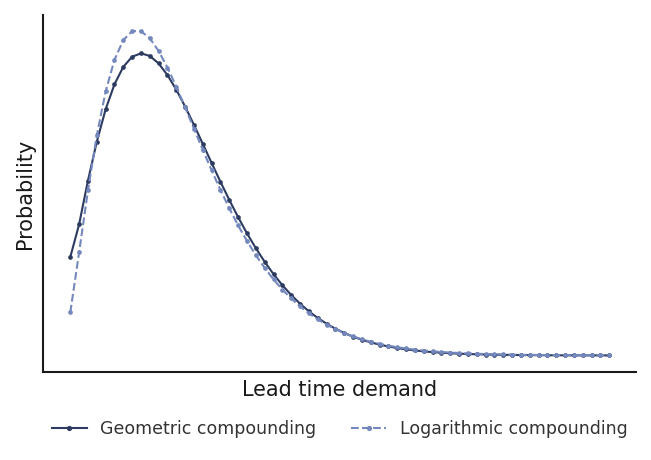

In [3]:
# Generate data series of geometric and logarithmic

mean = 12
variance = 60

p_demand_logarithmic = demand_prob_arr_negative_binomial(1,mean,variance)

beta = 1- ( 2/ (1+variance/mean) )

cumulative = 0 
p_comp_geometric = []
j = 1
while cumulative < 1-1e-6:
    p_j = (1-beta)*math.pow(beta,j-1)
    p_comp_geometric.append(p_j)
    cumulative += p_j
    j += 1

p_comp_geometric = np.array(p_comp_geometric)

p_demand_geometric = demand_probability_arr_Empiric_Compound_Poisson(1,mean,variance,p_comp_geometric)


x = range(len(p_demand_logarithmic))

plt.style.use('Results/our_style.mplstyle')
fig, ax = plt.subplots()

col1 = '#2D3B60'
col2 = '#7488BD'


ax.plot(x,p_demand_geometric[:len(p_demand_logarithmic)], label = "Geometric compounding", color = col1, marker = '.', linestyle = '-')
ax.plot(x,p_demand_logarithmic, label = "Logarithmic compounding", color = col2, marker = '.', linestyle = '--')

#ax.bar(x,p_demand_geometric[:len(p_demand_logarithmic)], label = "Geometric compounding", color = col1)
#ax.bar(x,p_demand_logarithmic, label = "Logarithmic compounding", color = col2)

ax.set_ylabel("Probability")
ax.set_xlabel("Lead time demand")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])


ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 2)


plt.show
plt.savefig(f'{image_dir}/logarithmic_vs_geometric_compounding.png', bbox_inches = 'tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

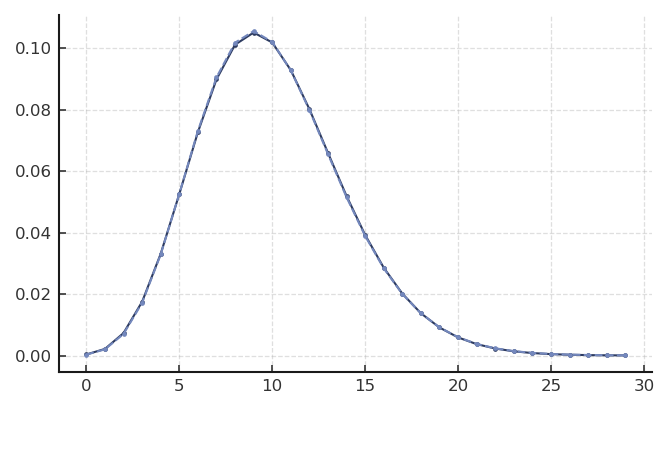

In [30]:
x = range(len(p_demand_logarithmic))

plt.style.use('Results/our_style.mplstyle')
fig, ax = plt.subplots()

col1 = '#2D3B60'
col2 = '#7488BD'


ax.plot(x,p_demand_geometric[:30], color = col1, marker = '.', linestyle = '-')

ax.plot(x,p_demand_logarithmic, color = col2, marker = '.', linestyle = '--')
ax

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 2)


plt.show

In [39]:
len(p_demand_geometric)

517